## Df + Lib

In [1]:
%store -r merge_unique_df

In [2]:
# essential
import pandas as pd
import matplotlib.pyplot as plt

# for NN
import keras
from keras.models import Sequential
# we most use sequential model -> one layer after the other (sequence of layer)
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanAbsolutePercentageError


# non so se siano utili
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

In [3]:
# in order to obtain the True/False for each genre
onehot_enc=pd.get_dummies(merge_unique_df['maingenere'],prefix='genre')
onehot_enc.head(2)

,genre_blues,genre_country,genre_dance,genre_disco,genre_folk,genre_funk,genre_house,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [4]:
# Conversione in valori binari (0 o 1) per rappresentare il main genere con 1 e gli altri con 0
one_hot_enc_binary = onehot_enc.applymap(lambda x: 1 if x else 0)

C:\Users\lovoa\AppData\Local\Temp\ipykernel_13296\823651478.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  one_hot_enc_binary = onehot_enc.applymap(lambda x: 1 if x else 0)


In [5]:
# we merge the 2 df
df_one_hot=pd.concat([merge_unique_df,one_hot_enc_binary],axis=1)
df_one_hot.head(2)

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],3.43,unknown,single,0.59,0.57,5.37,-9.97,...,0,0,0,0,1,0,0,0,0,0
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],3.43,unknown,single,0.59,0.57,5.37,-9.97,...,0,0,0,0,1,0,0,0,0,0


## U1 - Test ONE HOT

In [6]:
mask_u1=df_one_hot['User']==1
u1_onehot_df=df_one_hot[mask_u1]
u1_onehot_df.shape

(4669, 38)

### NN - test ONE HOT

In [7]:
# FIRST WE NEED TO DEFINE THE FEATURES
numerical_features = [
    'spotify_track_duration_minute', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness',
    'spotify_track_popularity', 'instrumentalness', 'liveness']

genre_features = [col for col in u1_onehot_df.columns if col.startswith('genre_')]

# UNION OF THE TWO 
total_features = numerical_features + genre_features

target='valence'

In [8]:
# DEFINITION OF TARGET AND FEATURES

x=u1_onehot_df[total_features]

y=u1_onehot_df[target]

In [9]:
# first we have to standardize
scaler=StandardScaler()
x[numerical_features]=scaler.fit_transform(x[numerical_features])

C:\Users\lovoa\AppData\Local\Temp\ipykernel_13296\3500654492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features]=scaler.fit_transform(x[numerical_features])


In [10]:
#TRAIN/TEST
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
model_onehot=Sequential([
    Dense(32,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(16,activation='relu'),
    Dense(1,activation='relu')
])

c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model_onehot.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [13]:
history_onehot=model_onehot.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1879 - mae: 0.3528 - val_loss: 0.0572 - val_mae: 0.1910
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0479 - mae: 0.1751 - val_loss: 0.0424 - val_mae: 0.1633
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0362 - mae: 0.1516 - val_loss: 0.0364 - val_mae: 0.1525
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0315 - mae: 0.1398 - val_loss: 0.0337 - val_mae: 0.1470
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0293 - mae: 0.1352 - val_loss: 0.0323 - val_mae: 0.1432
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0288 - mae: 0.1345 - val_loss: 0.0317 - val_mae: 0.1411
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0266 - mae: 0.1292 - val_loss: 0.0301 - val_mae: 0.1387
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0247 - mae: 0.1252 - val_loss: 0.0292 - val_mae: 0.1375
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0246 - mae: 

In [14]:
loss, mae = model_onehot.evaluate(x_test, y_test)
print(f'Loss: {loss}, MAE: {mae}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0278 - mae: 0.1299
Loss: 0.027465935796499252, MAE: 0.12963631749153137


WE CAN SEE THAT sice LOSS is our MSE=0.0278 

when we use the simple NN our MSE is equal 0.0304

so seams that we have a reduction

we have also a reduction with respect with the cross validation 0.033

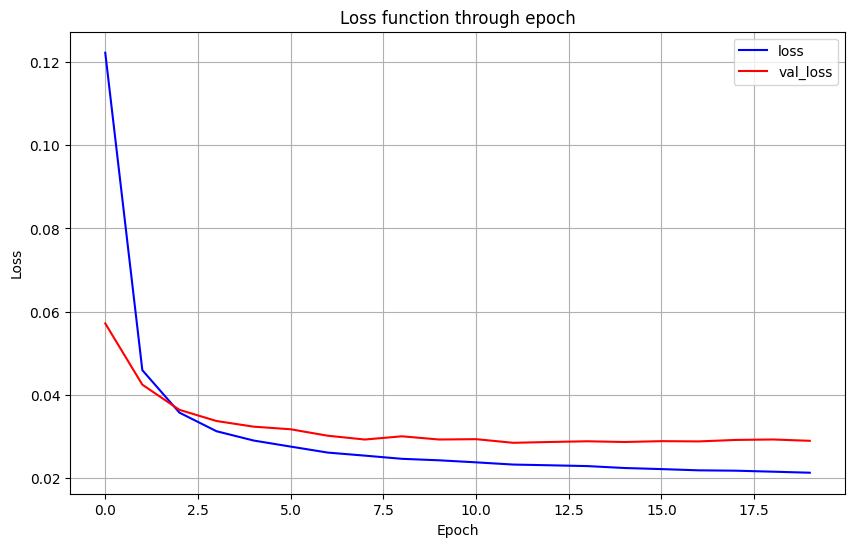

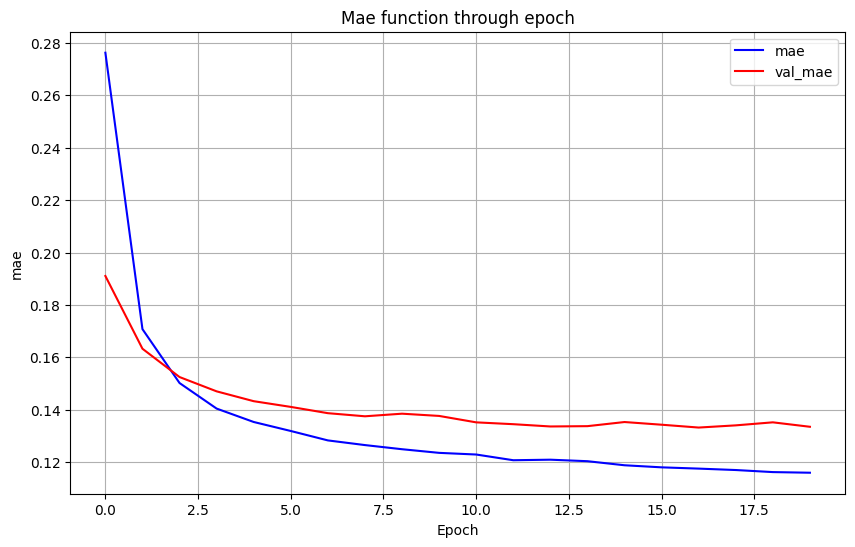

In [15]:
#SOME PLOT

#plot loss
plt.figure(figsize=(10,6))
plt.plot(history_onehot.history['loss'],color='blue',label='loss')
plt.plot(history_onehot.history['val_loss'],color='red',label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function through epoch')
plt.legend()
plt.grid()
plt.show()

    #plot mean
plt.figure(figsize=(10,6))
plt.plot(history_onehot.history['mae'],color='blue',label='mae')
plt.plot(history_onehot.history['val_mae'],color='red',label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.title('Mae function through epoch')
plt.grid()
plt.legend()
plt.show()   